# PyTorch hands-on Tutorials

## PyTorch Tutorial 02 - Tensor Basics

### Initializing a tensor with values

In [2]:
import torch
import numpy as np

In [7]:
x = torch.empty(1)
print(f"{x} is an empty tensor and not initialized")

tensor([1.0078]) is an empty tensor and not initialized


In [6]:
x_rand=torch.rand(2,2)
x_zeros=torch.zeros(2,2)
x_ones=torch.ones(2,2)
print(f"{x_rand} is a 2x2 tensor of random numbers")
print(f"{x_zeros} is a 2x2 tensor of zeros")
print(f"{x_ones} is a 2x2 tensor of ones")

tensor([[0.1719, 0.9470],
        [0.6675, 0.7632]]) is a 2x2 tensor of random numbers
tensor([[0., 0.],
        [0., 0.]]) is a 2x2 tensor of zeros
tensor([[1., 1.],
        [1., 1.]]) is a 2x2 tensor of ones


### Tensor properties

In [13]:
x=torch.rand(2,2, dtype=torch.float16)
print(f"{x.dtype} returns the data type")
print(f"{x.size()} returns the matrix size")
print(f"{x.device} returns the device used to perform operations")

torch.float16 returns the data type
torch.Size([2, 2]) returns the matrix size
cpu returns the device used to perform operations


### Tensor Element wise operations

In [20]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z1 = x + y
print("Element wise addition, either by x+y or torch.add(x,y)")
z1 = torch.add(x,y)
print(f"{z1}")

Element wise addition, either by x+y or torch.add(x,y)
tensor([[1.5366, 0.7826],
        [0.7602, 0.5329]])


In [21]:
print("Element wise subtraction, either by x-y or torch.sub(x,y)")
z2 = x + y
z2 = torch.sub(x,y)
print(f"{z2}")

Element wise subtraction, either by x-y or torch.sub(x,y)
tensor([[ 0.4398,  0.4125],
        [-0.3239, -0.1546]])


In [22]:
print("Element wise multiplication, either by x*y or torch.mul(x,y)")
z3 = x * y
z3 = torch.mul(x,y)
print(f"{z3}")

Element wise multiplication, either by x*y or torch.mul(x,y)
tensor([[0.5419, 0.1106],
        [0.1183, 0.0650]])


In [23]:
print(f"Element wise division, either by x/y or torch.div(x,y)")
z4 = x / y
z4 = torch.div(x,y)
print(f"{z4}")

Element wise division, either by x/y or torch.div(x,y)
tensor([[1.8021, 3.2294],
        [0.4025, 0.5502]])


### Tensor slicing

In [21]:
t = torch.rand(5,3, dtype=torch.float16)
print(t)
print("")
print("Slicing the second row")
print(t[1,:])

tensor([[0.4604, 0.6807, 0.7354],
        [0.4883, 0.9258, 0.6992],
        [0.6147, 0.0610, 0.4863],
        [0.9785, 0.1011, 0.8472],
        [0.7676, 0.2988, 0.8057]], dtype=torch.float16)

Slicing the second row
tensor([0.4883, 0.9258, 0.6992], dtype=torch.float16)


In [22]:
print("Slicing the 5th row, 2nd column item, then extracting the value")
print(t[4,1])
print(t[4,1].item())

Slicing the 5th row, 2nd column item, then extracting the value
tensor(0.2988, dtype=torch.float16)
0.298828125


### Resizing Tensors

In [5]:
f = torch.rand(3,4)
print(f)
f1 = f.view(4,3)
print(f1)
f2 = f.view(-1)
print(f2)

tensor([[0.0478, 0.4924, 0.1920, 0.5781],
        [0.7363, 0.1883, 0.7280, 0.3224],
        [0.9769, 0.9024, 0.8114, 0.6090]])
tensor([[0.0478, 0.4924, 0.1920],
        [0.5781, 0.7363, 0.1883],
        [0.7280, 0.3224, 0.9769],
        [0.9024, 0.8114, 0.6090]])
tensor([0.0478, 0.4924, 0.1920, 0.5781, 0.7363, 0.1883, 0.7280, 0.3224, 0.9769,
        0.9024, 0.8114, 0.6090])


When using -1 as dimension, the multidimensional tensor is transformed to a 1D-row vector that fits the appropriate size automatically 

### Numpy Arrays to PyTorch tensors

In [8]:
from matplotlib.style import available
a = np.ones(4)
b = torch.from_numpy(a)
print(b.device)
if torch.cuda.is_available():
    device=torch.device("cuda")
b = b.to(device)
c = torch.ones(4, device=device)
print(b)
print(c)
print(b+c)

cpu
tensor([1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
tensor([1., 1., 1., 1.], device='cuda:0')
tensor([2., 2., 2., 2.], device='cuda:0', dtype=torch.float64)


We can move a tensor to the GPU by using   
a) tensor_name = tensor_name.to(torch.device("cuda"))  
b) tensord_name = torch.tensor(size, device="cuda")

## PyTorch Tutorial 03 - Gradient Calculation with Autograd


### Gradient Calculation with Autograd

In [30]:
x = torch.rand(3, requires_grad=True)
print(x)

tensor([0.2271, 0.3016, 0.9031], requires_grad=True)


We are creating a graph that keeps track of the gradients
of x, so we can run backpropagation later

In [31]:
y = x + 2
print(y)
z = y*y*2
z = z.mean()
print(z)
z.backward() #dz = dz/dy * dy/dx
print(x.grad)

tensor([2.2271, 2.3016, 2.9031], grad_fn=<AddBackward0>)
tensor(12.4571, grad_fn=<MeanBackward0>)
tensor([2.9695, 3.0688, 3.8708])


Here we demonstrate that variables that depend on tensor x
carry the gradients and each operation has a relative backward operation.

In [32]:
y = x + 2
print(y)
f = y*y*2
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float16)
f.backward(v)
print(x.grad)

tensor([2.2271, 2.3016, 2.9031], grad_fn=<AddBackward0>)
tensor([ 3.8601, 12.2753,  3.8824])


If z is not a scalar value we need to pass the vector of values that need to be packpropagated

### Disabling the gradient

In [33]:
x = torch.rand(3, requires_grad=True)
print(x)
#x.requires_grad_(False) # in-place operation ->NOT PREFERED
y = x.detach()
print(y)
# with torch.no_grad():

tensor([0.4776, 0.2055, 0.5134], requires_grad=True)
tensor([0.4776, 0.2055, 0.5134])


In [34]:
for epoch in range(3):
    model_out = (x*3).sum()
    model_out.backward()
    print(x.grad)
    x.grad.zero_()

tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


When oprimizing our weights, at the end of each iteration we need to reset them as to not carry over previous values that will interfere with our calculations

## PyTorch Tutorial 04 - Backpropagation - Theory with Example


### Backpropagation

In [24]:
x1 = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and loss computation
y_hat = w*x1
loss =(y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


When backpropagating tensors that require gradient are optimized for, using the chain rule, whereas others that don't have a gradient are treated as constants

### Manual implementation of a NN including: forward pass, loss, gradient, backward pass using Numpy.  

In [34]:
X = np.array([1,2,3,4], dtype = np.float16)
Y = np.array([2,4,6,8], dtype = np.float16)
w = 0.0

# model prediction
def forward(x):
    return w*x 

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2 (w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

In [35]:
print(f"Prediction before training: f(5) = {forward(5):.3f}")
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l=loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    #update weights
    w-= learning_rate * dw
    if epoch % 1 == 0:
        print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79687500
epoch 3: w = 1.872, loss = 0.76953125
epoch 4: w = 1.949, loss = 0.12255859
epoch 5: w = 1.980, loss = 0.02015686
epoch 6: w = 1.992, loss = 0.00318527
epoch 7: w = 1.997, loss = 0.00045776
epoch 8: w = 1.998, loss = 0.00006032
epoch 9: w = 2.000, loss = 0.00003529
epoch 10: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 9.999


## PyTorch Tutorial 05 - Gradient Descent with Autograd and Backpropagation


### Stochastic Gradient Descent with Backporpagation using Autograd in PyTorch

In [41]:
X = torch.tensor([1,2,3,4], dtype = torch.float16)
Y = torch.tensor([2,4,6,8], dtype = torch.float16)
w = torch.tensor(0.0, dtype = torch.float16, requires_grad=True)

# model prediction
def forward(x):
    return w*x 

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")
learning_rate = 0.01
n_iters = 41

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l=loss(Y, y_pred)

    # gradients = backward pass
    l.backward()
    
    #update weights
    with torch.no_grad():
        w-= learning_rate * w.grad
    
    # zero gradients
    w.grad.zero_()
    if epoch % 5 == 0:
        print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 6: w = 1.245, loss = 5.91015625
epoch 11: w = 1.665, loss = 1.16113281
epoch 16: w = 1.852, loss = 0.22888184
epoch 21: w = 1.934, loss = 0.04577637
epoch 26: w = 1.970, loss = 0.00926971
epoch 31: w = 1.986, loss = 0.00183105
epoch 36: w = 1.994, loss = 0.00034070
epoch 41: w = 1.997, loss = 0.00006032
Prediction after training: f(5) = 9.984


## PyTorch Tutorial 06 - Training Pipeline: Model, Loss and Optimizer   

### Complete PyTorch Pipeline: Model, Loss and Optimizer   
Prediction: PyTorch Model  
Gradient Computation: Autograd  
Loss Computation: PyTorch Loss  
Parameter updates: PyTorch Optimizer

In [4]:
"""
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3, Training loop
    -forward pass: compute predition
    -backward pass: gradients
    -update weights
"""
import torch 
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32, device="cuda")
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32, device="cuda")

X_test = torch.tensor([5], dtype = torch.float32, device="cuda")

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(in_features=input_size, out_features=output_size).to(device="cuda")

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size).to(device="cuda")
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")
learning_rate = 0.01
n_iters = 51
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)

    # loss
    l=loss(Y, y_pred)

    # gradients = backward pass
    l.backward()
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()

    if epoch % 5 == 0:
        [w,b] = model.parameters()
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")


4 1
[('lin.weight', Parameter containing:
tensor([[-0.8817]], device='cuda:0', requires_grad=True)), ('lin.bias', Parameter containing:
tensor([-0.8608], device='cuda:0', requires_grad=True))]


SystemExit: 

c:\Users\Harry Soteriou\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## PyTorch Tutorial 07 - Linear Regression 

### Implementing a Linear Regression model from scratch

epoch: 10, loss =582.9234
epoch: 20, loss =341.1050
epoch: 30, loss =332.8644
epoch: 40, loss =332.5780
epoch: 50, loss =332.5679
epoch: 60, loss =332.5676
epoch: 70, loss =332.5676
epoch: 80, loss =332.5676
epoch: 90, loss =332.5676
epoch: 100, loss =332.5676


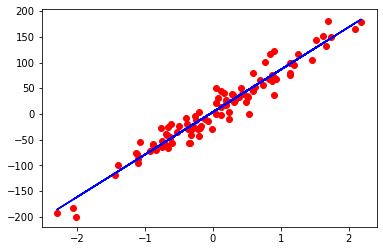

In [5]:
"""
0. Data preparation and pre-processing
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3, Training loop
    -forward pass: compute predition
    -backward pass: gradients
    -update weights
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. DATA PREPARATION
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape 
# n_samples -> how many rows/groups of data
#n_features -> how many numbers/features in each row
input_dim = n_features
out_dim = 1

device="cuda"
learning_rate = 0.1
n_iters = 100

X_test= torch.tensor(9, dtype=torch.float32, requires_grad=True, device=device)

# 1. DEFINE MODEL
model =nn.Linear(in_features=input_dim, out_features=out_dim)

# 2. LOSS AND OPTIMIZER
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 3. TRAINING LOOP AND WEIGHT UPDATE
for epoch in range(n_iters):
    # forward pass and loss
    y_predicted = model(X)
    loss = loss_fn(y_predicted, y)

    # backward pass
    loss.backward()

    # weight update and reset
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 10 ==0:
        print(f"epoch: {epoch+1}, loss ={loss.item():.4f}")
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## PyTorch Tutorial 08 - Logistic Regression 

### Implementing a Logistic Regression model from scratch

In [20]:
"""
0. Data preparation and pre-processing
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3, Training loop
    -forward pass: compute predition
    -backward pass: gradients
    -update weights
"""
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device="cuda"
learning_rate = 0.1
n_iters = 100

# 0. DATA PREPARATION
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape # samples -> rows, features -> columns 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler() # mean = 0, variance = 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# 1. DEFINE MODEL
# Logistic Regression: f(x) = sigmoid(w*x +b)

class LogisticRegression(nn.Module):

    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x)) 
        return y_predicted

model = LogisticRegression(in_features = n_features)

# 2. LOSS AND OPTIMIZER
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 3. TRAINING LOOP AND WEIGHT UPDATE
for epoch in range(n_iters):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = loss_fn(y_predicted, y_train)

    # backward pass
    loss.backward()

    # weight update and reset
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss: {loss.item():.4f}")
# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy equals: {acc:.3f}")

epoch: 10, loss: 0.2423
epoch: 20, loss: 0.1766
epoch: 30, loss: 0.1469
epoch: 40, loss: 0.1293
epoch: 50, loss: 0.1175
epoch: 60, loss: 0.1088
epoch: 70, loss: 0.1022
epoch: 80, loss: 0.0969
epoch: 90, loss: 0.0926
epoch: 100, loss: 0.0889
Accuracy equals: 0.930


## PyTorch Tutorial 09 - Dataset and DataLoader - Batch Training 

epoch = 1 forward and backward pass of ALL training samples  
batch_size = number of training samples in one forward & backward pass  
number of iterations = number of passes, each pass using [batch_size] number of samples  
e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [122]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import pandas as pd

In [142]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("./data/wine/wine.csv", delimiter =",", dtype = np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index] 
    
    def __len__(self):
        return self.n_samples


dataset = WineDataset()
batch_size = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)
## WHEN CHANGING NUMBER OF NUM_WORKERS >0 IT SPITS OUT AN ERROR AND I DONT KNOW WHY
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)

Dataset module is not that important as long as you can transform the data into tensors. The important thing here is the Dataloader module which allows to create batches and data shuffling

In [144]:
# training loop
print(f"Total samples are: {total_samples}, number of iterations are: {n_iterations}")
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forwqrd, bqck3qrd pass and weight update
        if (i+1)% 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

Total samples are: 178, number of iterations are: 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## PyTorch Tutorial 10 - DataSet Transforms

The takeaway from this tutorial is how we can create our custom transform methods and use the dunder __call__ method to apply the transform without creating a specific object

In [ ]:
import torch
import torchvision

In [ ]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt("./data/wine/wine.csv", delimiter =",", dtype = np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index] 

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples


class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    """
    Example of a custom transform to show how to write a transform function
    """
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *=self.factor
        return inputs, targets

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
batch_size = 4

Another takeaway: transforms.Compose(), can take a list of transforms and use them to apply various transforms sequentially

## PyTorch Tutorial 11 - Softmax and Cross-Entropy

In [41]:
import torch 
import torch.nn as nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import optim
import numpy as np
import math

In [42]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)

x=np.array([2.0, 1.0, 0.1])
outputs =softmax(x)
print(f"softmax numpy: {outputs}")

x1 = torch.tensor([2.0, 1.0, 0.1], dtype=torch.float32)
outputs1 = torch.softmax(x1, dim=0)
print(f"torch softmax outputs: {outputs1}")

softmax numpy: [0.65900114 0.24243297 0.09856589]
torch softmax outputs: tensor([0.6590, 0.2424, 0.0986])


In [43]:
"""
Now let's code cross entropy loss from scratch
cross entropy = 1/N_samples * -Sum(y_actual * log(y_predicted))
"""
def cross_entropy_loss(actual, predicted, n_samples=1):
    return -np.sum(actual*np.log(predicted))/n_samples

# y must be one-hot encoded
y_target = np.array([1, 0, 0])

# y_pred has probabilities
y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.2, 0.6])
l1, l2 = cross_entropy_loss(y_target, y_pred_good), cross_entropy_loss(y_target, y_pred_bad)
print(f"Good prediction cross entropy {l1}")
print(f"Bad prediction cross entropy {l2}")

Good prediction cross entropy 0.35667494393873245
Bad prediction cross entropy 2.3025850929940455


In [44]:
"""
Now we will use the cross entropy loss offered by PyTorch
nn.crossEntropyLoss applies the nn.LogSoftmax + nn.NLLLoss 
(negative log likelihood loss) -> No Softmax in last layer!
y_actual has class labels, not one-hot enoded!
y_ored has raw scores (logits) not Softmax probabilities
"""

loss= nn.CrossEntropyLoss()
y_actual = torch.tensor([2,0,1]) 
# n_samples * n_classes = 1 x 3
y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])
l1 = loss(y_pred_good, y_actual)
l2 = loss(y_pred_bad, y_actual)
print(f"Accurate Cross entropy loss {l1}")
print(f"Inaccurate Cross entropy loss {l2}")

_, prediction1 = torch.max(y_pred_good,1)
_, prediction2 = torch.max(y_pred_bad,1)

print(f"Good prediction cross entropy {prediction1}")
print(f"Bad prediction cross entropy {prediction2}")


Accurate Cross entropy loss 0.3018244206905365
Inaccurate Cross entropy loss 1.6241613626480103
Good prediction cross entropy tensor([2, 0, 1])
Bad prediction cross entropy tensor([0, 2, 1])


Now lets classify the MNIST dataset using PyTorch
going through a standard training pipeline

In [45]:
# Download training data 
XY_train = datasets.MNIST(root="./data/mnist/",download=True, train=True, transform=transforms.ToTensor())

# Download test data
XY_test = datasets.MNIST(root="./data/mnist/",download=True, train=False, transform=transforms.ToTensor())

In [46]:
XY_train.data.shape[0]
XY_test.data.shape[0]

10000

In [47]:
# Create DataLoaders
batch_size = 64
n_epochs =50
total_samples = XY_train.data.shape[0]
n_iterations = math.ceil(total_samples/batch_size)

train_dataloader = DataLoader(dataset=XY_train, batch_size = batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=XY_test, batch_size = batch_size, shuffle=True, num_workers=0)

for X,y in test_dataloader:
    print(f"Shape of X_test [n_samples, channel, height, width]: {X.shape}")
    print(f"Shape of y_Test: {y.shape} {y.dtype}")
    break

Shape of X_test [n_samples, channel, height, width]: torch.Size([64, 1, 28, 28])
Shape of y_Test: torch.Size([64]) torch.int64


In [48]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define a custom Multiclass classification NN
class Classification_NN(nn.Module):
    
    # Custom classification Network
    def __init__(self, n_inputs, hidden_size, n_output):
        super(Classification_NN, self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_output)
        )


    def forward(self, x):
        x = self.flatten(x)
        z = self.model(x)
        return z

# Initialize model, choose loss and optimizer 
model = Classification_NN(n_inputs=28*28, hidden_size=512, n_output=10).to(device)
criterion = nn.CrossEntropyLoss() #Softmax + Negative Log Likehood Loss
optimizer = optim.Adagrad(params=model.parameters(), lr=0.001)
print(model)

Using cuda device
Classification_NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [49]:
# Define training function: calculate error, backpropagate, reset gradient 

def train(dataloader, model ,loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        
        # Computer prediction error => forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        # Backpropagation -> backward pass and reset gradient
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:.4f}, [{current:.4f}/{size:.4f}]")


# Define test function: evaluate performance 

def test(dataloader, model ,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [50]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, criterion, optimizer)
    test(test_dataloader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.2987, [0.0000/60000.0000]
loss: 0.4629, [6400.0000/60000.0000]
loss: 0.6247, [12800.0000/60000.0000]
loss: 0.3352, [19200.0000/60000.0000]
loss: 0.4305, [25600.0000/60000.0000]
loss: 0.2999, [32000.0000/60000.0000]
loss: 0.2348, [38400.0000/60000.0000]
loss: 0.2274, [44800.0000/60000.0000]
loss: 0.2413, [51200.0000/60000.0000]
loss: 0.3357, [57600.0000/60000.0000]
Test Error: 
 Accuracy: 91.8%, Avg loss: 0.294055 

Epoch 2
-------------------------------
loss: 0.3286, [0.0000/60000.0000]
loss: 0.3340, [6400.0000/60000.0000]
loss: 0.4320, [12800.0000/60000.0000]
loss: 0.4747, [19200.0000/60000.0000]
loss: 0.2134, [25600.0000/60000.0000]
loss: 0.2961, [32000.0000/60000.0000]
loss: 0.1372, [38400.0000/60000.0000]
loss: 0.2787, [44800.0000/60000.0000]
loss: 0.3369, [51200.0000/60000.0000]
loss: 0.2976, [57600.0000/60000.0000]
Test Error: 
 Accuracy: 92.6%, Avg loss: 0.260540 

Epoch 3
-------------------------------
loss: 0.2342, [0.0000/6000

In [88]:
# Saving models

# torch.save(model.state_dict(), 'model.pth')
# print("Saved PyTorch Model State to model.pth"))

In [89]:
# Loading models 

# model = Classification_NN(n_inputs=28*28, hidden_size=512, n_output=10).to(device)
# model.load_state_dict(torch.load("model.pth"))

In [191]:
# Make predictions -> NEEDS FIXING
classes = [int(item[0]) for item in test_dataloader.dataset.classes]
print(classes)
eval_model = model.to(device=device).eval()
x, y = XY_test[0][0].to(device=device), XY_test[0][1]
with torch.no_grad():
    pred = eval_model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Predicted: "7", Actual: "7"


## PyTorch Tutorial 12 - Activation Functions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# When defining activation functions there are two ways

# Option 1: explicitly define self.activation_fn_name

class NeuralNetwork(nn.Module):

    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        super(NeuralNetwork, self).__init__()
        """
        We first define all different layers and activation functions that we will need
        """
        self.linear1 = nn.Linear(input_nodes, hidden_nodes)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_nodes, hidden_nodes)
        self.linear3 = nn.Linear(hidden_nodes, output_nodes)
        self.softmax = nn.Softmax(2)

    def forward(self, x):
        # In the forward pass we essentially assemble the network architecture
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        out = self.softmax(out)
        return out

# Option 2: use activation functions directly in forward pass

class NeuralNetwork(nn.Module):

    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        super(NeuralNetwork, self).__init__()
        """
        We first define all different layers and activation functions that we will need
        """
        self.linear1 = nn.Linear(input_nodes, hidden_nodes)
        self.linear2 = nn.Linear(hidden_nodes, hidden_nodes)
        self.linear3 = nn.Linear(hidden_nodes, output_nodes)

    def forward(self, x):
        # In the forward pass we essentially assemble the network architecture
        out = torch.relu(self.linear1(x))
        out = torch.relu(self.linear2(out))
        out = torch.softmax(self.linear3(out))
        return out

# Other available activation functions
# nn.ReLU
# nn.Tanh()
# nn.Sigmoid()
# nn.Softmax()
# nn.LeakyReLU()
# For more check torch.nn.functional

## PyTorch Tutorial 13 - Feed-Forward Neural Network

torch.Size([100, 1, 28, 28]) torch.Size([100])


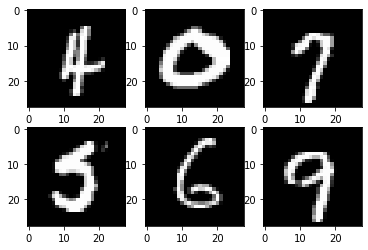

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# import the dataset
train_dataset = torchvision.datasets.MNIST(root = "./data/mnist/MNIST/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = "./data/mnist/MNIST/", train=False, transform=transforms.ToTensor())

# data loaders
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()


In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.leaky_relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # because we are using crossentropy loss we dont need to define
        # a last layer activation function because it is applied automatically
        out = self.linear1(x)
        out = self.leaky_relu(out)
        out = self.linear2(out)
        out = self.leaky_relu(out)
        out = self.linear3(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size=num_classes).to(device)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100 x 1 x 28 x 28 -> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples +=labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")


[(0, ('', NeuralNet(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
))), (1, ('linear1', Linear(in_features=784, out_features=100, bias=True))), (2, ('leaky_relu', LeakyReLU(negative_slope=0.01))), (3, ('linear2', Linear(in_features=100, out_features=100, bias=True))), (4, ('linear3', Linear(in_features=100, out_features=10, bias=True)))]


SystemExit: 

## PyTorch Tutorial 14 - Convolutional Neural Network

### Import libraries, define hyperparameters, configure GPU.  Define data transforms, import data and visualize dataset batch

Files already downloaded and verified


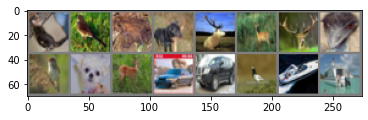

torch.Size([16, 3, 32, 32])
torch.Size([16, 6, 28, 28])
torch.Size([16, 6, 14, 14])
torch.Size([16, 16, 10, 10])
torch.Size([16, 16, 5, 5])


In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper parameters
num_epochs = 10
batch_size = 16
learning_rate = 0.001

# the dataset has a PILImage images of range [0,1]
# we need to tranform them to Tensors of normalized range [-1, 1]

transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# import the dataset
train_dataset = torchvision.datasets.CIFAR10(root = "./data/CIFAR10/", train=True, transform=transformations, download=True)
test_dataset = torchvision.datasets.CIFAR10(root = "./data/CIFAR10/", train=False, transform=transformations)

# data loaders
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def imshow(img):
    img = img / 2 + 0.5 # unonrmalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

#visualize some random training images
dataiter =iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)


### Define model, loss, optimizer and the training loop

In [17]:

# define model

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.leaky_relu = nn.LeakyReLU()
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120) #channels * height * width
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self,x):
        # because we are using crossentropy loss we dont need to define
        # a last layer activation function because it is applied automatically
        x = self.pool(self.leaky_relu(self.conv1(x))) #conv1->L_relu->pool
        x = self.pool(self.leaky_relu(self.conv2(x))) #conv2->L_relu->pool
        x = x.view(-1, 16*5*5) # flatten

        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x) # no activattion function applied as cross-entropy metric takes care of that
        return x

model = ConvNet().to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")


epoch 1 / 10, step 100/3125, loss = 2.3158
epoch 1 / 10, step 200/3125, loss = 2.2842
epoch 1 / 10, step 300/3125, loss = 2.2915
epoch 1 / 10, step 400/3125, loss = 2.2865
epoch 1 / 10, step 500/3125, loss = 2.2965
epoch 1 / 10, step 600/3125, loss = 2.3010
epoch 1 / 10, step 700/3125, loss = 2.3057
epoch 1 / 10, step 800/3125, loss = 2.3093
epoch 1 / 10, step 900/3125, loss = 2.2675
epoch 1 / 10, step 1000/3125, loss = 2.2755
epoch 1 / 10, step 1100/3125, loss = 2.2818
epoch 1 / 10, step 1200/3125, loss = 2.2882
epoch 1 / 10, step 1300/3125, loss = 2.3055
epoch 1 / 10, step 1400/3125, loss = 2.3112
epoch 1 / 10, step 1500/3125, loss = 2.2965
epoch 1 / 10, step 1600/3125, loss = 2.2920
epoch 1 / 10, step 1700/3125, loss = 2.2688
epoch 1 / 10, step 1800/3125, loss = 2.2939
epoch 1 / 10, step 1900/3125, loss = 2.2796
epoch 1 / 10, step 2000/3125, loss = 2.2962
epoch 1 / 10, step 2100/3125, loss = 2.2821
epoch 1 / 10, step 2200/3125, loss = 2.3022
epoch 1 / 10, step 2300/3125, loss = 2.29

### Evaluate the performance on the test set

In [18]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0] * 10
    n_class_samples = [0] * 10

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f"Accuracy of {classes[i]}: {acc} %")

accuracy = 41.25
Accuracy of plane: 59.1 %
Accuracy of car: 48.2 %
Accuracy of bird: 18.1 %
Accuracy of cat: 34.8 %
Accuracy of deer: 36.8 %
Accuracy of dog: 32.3 %
Accuracy of frog: 40.6 %
Accuracy of horse: 50.3 %
Accuracy of ship: 47.0 %
Accuracy of truck: 45.3 %


## PyTorch Tutorial 15 - Transfer Learning

### Define transforms, Import data, Write model training function

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    "train": transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ]),
    "val" : transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])
}

# import data
data_dir = "data\\hymenoptera_data"
sets = ["train", "val"]

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                    for x in ["train", "val"]}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size = 16, shuffle=True, num_workers =2)
                    for x in ["train", "val"]}

dataset_sizes = {i:len(image_datasets[i]) for i in ["train", "val"]}

class_names = image_datasets["train"].classes
print(class_names)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        #Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train() # set model in training mode
            else:
                model.eval() # set model in eval mode
            
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward +optimize only if in training phase
                    if phase == "train":
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == "train":
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() /dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    
        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")
    print(f"Best val Acc: {best_acc:.4f}")

    #load best model weights
    model.load_state_dict(best_model_wts)
    return model


['ants', 'bees']


### Retrain pre-trained network with a different last layer depending on task

In [34]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

Epoch 1/20
----------
train Loss: 0.6694 Acc: 0.5779
val Loss: 0.6027 Acc: 0.7190

Epoch 2/20
----------
train Loss: 0.6039 Acc: 0.6885
val Loss: 0.5183 Acc: 0.8039

Epoch 3/20
----------
train Loss: 0.5110 Acc: 0.7992
val Loss: 0.4785 Acc: 0.8170

Epoch 4/20
----------
train Loss: 0.4782 Acc: 0.7992
val Loss: 0.4234 Acc: 0.8824

Epoch 5/20
----------
train Loss: 0.4142 Acc: 0.8525
val Loss: 0.3858 Acc: 0.8954

Epoch 6/20
----------
train Loss: 0.4000 Acc: 0.8689
val Loss: 0.3478 Acc: 0.9216

Epoch 7/20
----------
train Loss: 0.3517 Acc: 0.8770
val Loss: 0.3385 Acc: 0.9020

Epoch 8/20
----------
train Loss: 0.3746 Acc: 0.8566
val Loss: 0.3374 Acc: 0.9020

Epoch 9/20
----------
train Loss: 0.3554 Acc: 0.8852
val Loss: 0.3306 Acc: 0.9150

Epoch 10/20
----------
train Loss: 0.3688 Acc: 0.8566
val Loss: 0.3367 Acc: 0.9085

Epoch 11/20
----------
train Loss: 0.3381 Acc: 0.9221
val Loss: 0.3391 Acc: 0.8954

Epoch 12/20
----------
train Loss: 0.3273 Acc: 0.9139
val Loss: 0.3259 Acc: 0.9020

E

### Use pretrained network with all layers frozen, re-train only last layer

In [36]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

Epoch 1/20
----------
train Loss: 0.7438 Acc: 0.5533
val Loss: 0.6388 Acc: 0.6078

Epoch 2/20
----------
train Loss: 0.6129 Acc: 0.6885
val Loss: 0.5633 Acc: 0.6863

Epoch 3/20
----------
train Loss: 0.5677 Acc: 0.7213
val Loss: 0.5464 Acc: 0.6993

Epoch 4/20
----------
train Loss: 0.5406 Acc: 0.7459
val Loss: 0.5000 Acc: 0.7451

Epoch 5/20
----------
train Loss: 0.5115 Acc: 0.7705
val Loss: 0.4883 Acc: 0.7712

Epoch 6/20
----------
train Loss: 0.5079 Acc: 0.7582
val Loss: 0.4407 Acc: 0.8235

Epoch 7/20
----------
train Loss: 0.4782 Acc: 0.8156
val Loss: 0.4294 Acc: 0.8301

Epoch 8/20
----------
train Loss: 0.4599 Acc: 0.8156
val Loss: 0.4217 Acc: 0.8627

Epoch 9/20
----------
train Loss: 0.4530 Acc: 0.8238
val Loss: 0.4211 Acc: 0.8758

Epoch 10/20
----------
train Loss: 0.4484 Acc: 0.8115
val Loss: 0.4102 Acc: 0.8693

Epoch 11/20
----------
train Loss: 0.4513 Acc: 0.8197
val Loss: 0.4078 Acc: 0.8693

Epoch 12/20
----------
train Loss: 0.4223 Acc: 0.8484
val Loss: 0.4072 Acc: 0.8824

E

## PyTorch Tutorial 16 - How to Use the TensorBoard

### Reusing the code from tutorial 13

torch.Size([100, 1, 28, 28]) torch.Size([100])


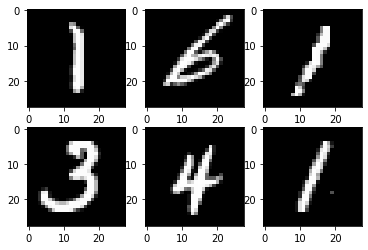

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("runs\\mnist")

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# import the dataset
train_dataset = torchvision.datasets.MNIST(root = "./data/mnist/MNIST/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = "./data/mnist/MNIST/", train=False, transform=transforms.ToTensor())

# data loaders
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
#plt.show()
img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist_images", img_grid)
#sys.exit()

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.leaky_relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self,x):
        # because we are using crossentropy loss we dont need to define
        # a last layer activation function because it is applied automatically
        out = self.linear1(x)
        out = self.leaky_relu(out)
        out = self.linear2(out)
        out = self.leaky_relu(out)
        out = self.linear3(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size=num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

writer.add_graph(model, samples.reshape(-1,28*28).to(device))

# training loop

n_total_steps = len(train_loader)
running_loss = 0.0
running_correct = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100 x 1 x 28 x 28 -> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
            writer.add_scalar("training loss", running_loss / 100, epoch * n_total_steps + i)
            writer.add_scalar("accuracy", running_correct / 100, epoch * n_total_steps + i)
            running_loss = 0.0
            running_correct = 0

epoch 1 / 2, step 100/600, loss = 0.4242
epoch 1 / 2, step 200/600, loss = 0.3922
epoch 1 / 2, step 300/600, loss = 0.2741
epoch 1 / 2, step 400/600, loss = 0.3091
epoch 1 / 2, step 500/600, loss = 0.1880
epoch 1 / 2, step 600/600, loss = 0.1091
epoch 2 / 2, step 100/600, loss = 0.1418
epoch 2 / 2, step 200/600, loss = 0.1762
epoch 2 / 2, step 300/600, loss = 0.2061
epoch 2 / 2, step 400/600, loss = 0.0714
epoch 2 / 2, step 500/600, loss = 0.1001
epoch 2 / 2, step 600/600, loss = 0.1255


In [16]:
# val
labels = []
preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, val_labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        val_labels = val_labels.to(device)
        outputs = model(images)

        #value, index
        _, predicted = torch.max(outputs.data, 1)
        n_samples += val_labels.shape[0]
        n_correct += (predicted == val_labels).sum().item()
        class_predictions = [F.softmax(output, dim=0) for output in outputs]

        preds.append(class_predictions)
        labels.append(predicted)
    
    preds = torch.cat([torch.stack(batch) for batch in preds])
    labels = torch.cat(labels)

    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

    classes = range(10)
    for i in classes:
        labels_i = labels == i
        preds_i = preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()

accuracy = 96.35


## PyTorch Tutorial 17 - Saving and Loading Models

In [ ]:
import torch
import torch.nn as nn

PATH = "models\\"
model = ConvNet().to(device)
args = model.parameters()

### Save entire model, along with weights

In [ ]:
## Complete model
torch.save(model, PATH) # can save tensors, models or dicts (uses pickle to serialize objects)

# model class must be defined somwhere
model = torch.load(PATH)
model.eval()

### Save only model weights (recommended way of saving)

In [ ]:
# State dict
torch.save(model.state_dict(), PATH)

#model must be created again with same architecture
model = NeuralNet(*args)
model.load_state_dict(torch.load(PATH))
model.eval()

### Running this will actually save the model

In [ ]:
FILE= "models/model.pth"
#################################
# LAZY WAY
# lazy_save(model, FILE)
# model = lazy_load(FILE)
# model.eval()
#for param in model.parameters():
#    print(param)
#################################

#################################
# PROPER WAY
torch.save(model.state_dict(), FILE)
loaded_model = Model(n_input_features=16, n_hidden=8)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()
#################################
for param in loaded_model.parameters():
    print(param)

### Practical example

In [23]:
class Model(nn.Module):
    def __init__(self, n_input_features, n_hidden):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.ReLU(nn.Linear(n_input_features, n_hidden)),
            nn.ReLU(nn.Linear(n_hidden, n_hidden)),
            nn.Linear(n_hidden, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

def lazy_save(model, FILE):
    torch.save(model, FILE)

def lazy_load(FILE):
    torch.load(FILE)

def proper_save(model, FILE):
    torch.save(model.state_dict(), FILE)


model = Model(n_input_features=16, n_hidden=8)

# train model...
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(optimizer.state_dict())
checkpoint_path = "models\\checkpoints\\"
checkpoint = {
    "epoch": 90,
    "model_state": model.state_dict(),
    "optim_state": optimizer.state_dict()
}
torch.save(checkpoint, os.path.join(checkpoint_path,"checkpoint.pth"))

loaded_checkpoint = torch.load(os.path.join(checkpoint_path,"checkpoint.pth"))
epoch = loaded_checkpoint["epoch"]

model = Model(n_input_features=16, n_hidden=8)
optimizer = optim.SGD(model._parameters(), lr=learning_rate)

model.load_state_dict(checkpoint["model_state"])
optimizer.load_state_dict(checkpoint["optim_state"])

print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'params': [0, 1, 2, 3, 4, 5]}]}


## Pytorch Tutorial 18: Learning rate Scheduler